# Initial data exploration

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [2]:
recipe_path = "https://raw.githubusercontent.com/lorenzomad/foodMapping/main/data/RAW_recipes.csv"

recipes_df = pd.read_csv(recipe_path, index_col="id")

In [3]:
print(recipes_df.head())
print(recipes_df.shape)

                                              name  \
id                                                   
137739  arriba   baked winter squash mexican style   
31490             a bit different  breakfast pizza   
112140                   all in the kitchen  chili   
59389                           alouette  potatoes   
44061           amish  tomato ketchup  for canning   

                                              ingredients  Unnamed: 3  \
id                                                                      
137739  ['winter squash', 'mexican seasoning', 'mixed ...         NaN   
31490   ['prepared pizza crust', 'sausage patty', 'egg...         NaN   
112140  ['ground beef', 'yellow onions', 'diced tomato...         NaN   
59389   ['spreadable cheese with garlic and herbs', 'n...         NaN   
44061   ['tomato juice', 'apple cider vinegar', 'sugar...         NaN   

        Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  
id                          

Let's create the starting dataframe with only the relevant characteristics

In [4]:
recipes_df = recipes_df[["name", "ingredients"]].sort_values("id")
recipes_df.head()

,name,ingredients
id,,
38,low fat berry blue frozen dessert,"['blueberries', 'granulated sugar', 'vanilla y..."
39,biryani,"['saffron', 'milk', 'hot green chili peppers',..."
40,best lemonade,"['sugar', 'lemons, rind of', 'fresh water', 'f..."
41,carina s tofu vegetable kebabs,"['extra firm tofu', 'eggplant', 'zucchini', 'r..."
43,best blackbottom pie,"['graham cracker crumbs', 'sugar', 'butter', '..."


Now we want to work on the df to extract all the ingredient names
1) convert the items to lists

In [5]:
recipes_df["ingredients"] = recipes_df["ingredients"].apply(eval)
recipes_df

,name,ingredients
id,,
38,low fat berry blue frozen dessert,"[blueberries, granulated sugar, vanilla yogurt..."
39,biryani,"[saffron, milk, hot green chili peppers, onion..."
40,best lemonade,"[sugar, lemons, rind of, fresh water, fresh le..."
41,carina s tofu vegetable kebabs,"[extra firm tofu, eggplant, zucchini, red pepp..."
43,best blackbottom pie,"[graham cracker crumbs, sugar, butter, cornsta..."
...,...,...
537459,bailey s chocotini,"[baileys irish cream, chocolate liqueur, vodka]"
537485,5 ingredient salted caramel crumble bars,"[pillsbury sugar cookie dough, caramel topping..."
537543,moist gingerbread cake,"[unsalted butter, applesauce, egg, unsulphured..."


Now we can count how many elements are there for each ingredient and apply other actions

In [9]:
all_ingredients = recipes_df['ingredients'].explode()
all_ingredients

id
38             blueberries
38        granulated sugar
38          vanilla yogurt
38             lemon juice
39                 saffron
                ...       
537716         blue cheese
537716          cheez whiz
537716               rolls
537716         green onion
537716             parsley
Name: ingredients, Length: 2096582, dtype: object

In [13]:
ingredient_counts = recipes_df["ingredients"].explode().value_counts()
ingredient_counts.index.sort_values()

Index(['1% fat buttermilk', '1% fat cottage cheese',
       '1% low-fat chocolate milk', '1% low-fat milk', '10 bean soup mix',
       '10 inch low-fat flour tortillas', '10" pie crust', '10% cream',
       '10-inch  deep dish pie crust', '10-inch baked pie shells',
       ...
       'zinfandel', 'ziploc bag', 'ziploc bags', 'ziti pasta', 'ziti rigati',
       'zoom quick hot cereal', 'zucchini',
       'zucchini with italian-style tomato sauce', 'zwieback toast',
       'zwieback toast crumbs'],
      dtype='object', length=14942)

Let's try to plot the top 20 used ingredients now

(array([38., 33., 29., 20., 16., 22., 14.,  8.,  8., 11.,  8., 11.,  3.,
         5.,  4.,  3.,  1.,  8.,  3.,  1.,  2.,  1.,  2.,  1.,  3.,  5.,
         0.,  4.,  1.,  0.,  2.,  4.,  1.,  0.,  1.,  3.,  2.,  0.,  0.,
         0.,  1.,  3.,  0.,  0.,  1.,  0.,  5.,  0.,  1.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,
         0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 1000.,  1190.,  1380.,  1570.,  1760.,  1950.,  2140.,  2330.,
         2520.,  2710.,  2900.,  3090.,  3280.,  3470.,  3660.,  3850.,
         4040.,  4230.,  4420.,  4610.,  4800.,  4990.,  5180.,  5370.,
         5560.,  5750.,  5940.,  6130.,  6320.,  6510.,  6700.,  6890.,
         7080.,  7270.,  7460.,  7650.,  7840.,  8030.,  8220.,  8410.,
         8600.,  8790.,  8980.,  9170.,  9360.,  9550.,  9740.,  9930.,
  

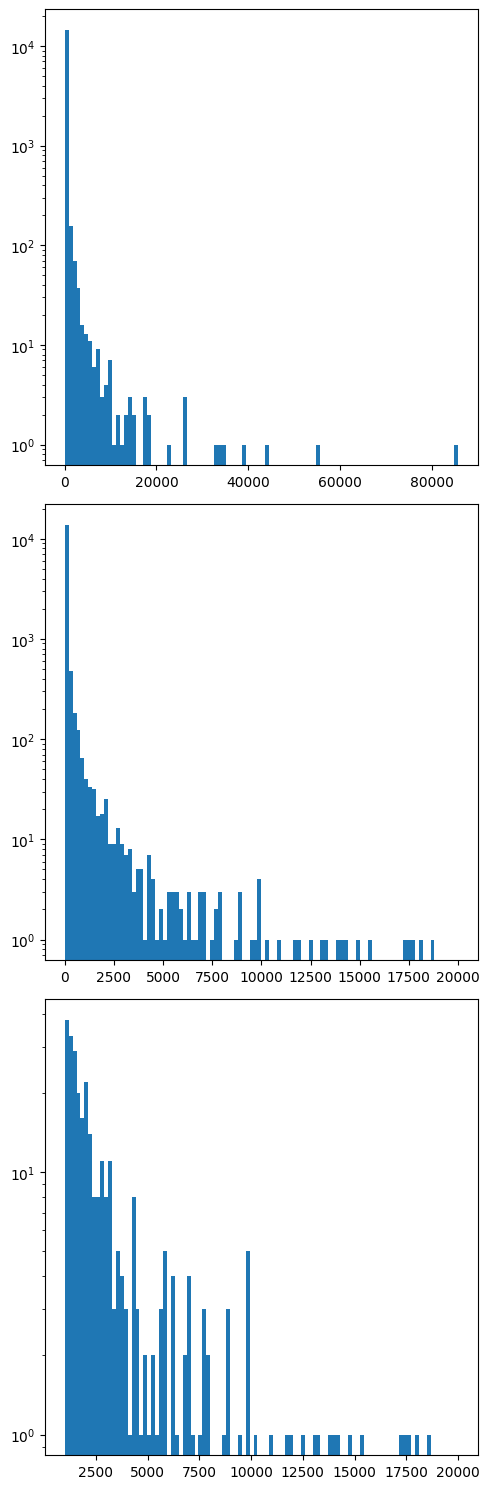

In [16]:
# Create plot

fig, axs = plt.subplots(3, 1, figsize=(5, 15), tight_layout=True)
axs[0].hist(ingredient_counts, bins = 100, log= True)

axs[1].hist(ingredient_counts, range = (0, 20000), bins = 100, log= True)

axs[2].hist(ingredient_counts, range = (1000, 20000), bins = 100, log= True)

There are a lot of ingredients, let's limit ourselves to the ones that appear in at least 20 recipes


In [17]:

ingredients_df = pd.DataFrame(ingredient_counts)
ingredients_df.rename(columns={'ingredients' : 'count'}, inplace = True)
ingredients_df

,count
salt,85746
butter,54975
sugar,44535
onion,39065
water,34914
...,...
spanish rice and vermicelli mix,1
fruit bits,1
passover wine,1
smoked trout fillet,1


In [18]:
ingredients_df.shape

(14942, 1)

In [21]:
ingredients_short = ingredients_df[ingredients_df["count"] > 100]
ingredients_short.shape

(1826, 1)

this reduced the number of items to 1 third

Now I want to analyze this items to understand if I can merge some of them, they probably belong to the same class but they show a sligthly different name
Let's first explore a subset to understand what happens with the names

In [24]:
ingredients_short[0:100].index.sort_values()

Index(['all-purpose flour', 'bacon', 'baking powder', 'baking soda',
       'balsamic vinegar', 'black pepper', 'boneless skinless chicken breasts',
       'brown sugar', 'butter', 'buttermilk', 'canola oil', 'carrot',
       'carrots', 'cayenne pepper', 'celery', 'cheddar cheese',
       'chicken broth', 'chicken stock', 'chili powder', 'cilantro',
       'cinnamon', 'cornstarch', 'cream cheese', 'cumin', 'diced tomatoes',
       'dijon mustard', 'dried basil', 'dried oregano', 'dried thyme', 'egg',
       'egg whites', 'eggs', 'extra virgin olive oil', 'flour', 'fresh basil',
       'fresh cilantro', 'fresh ginger', 'fresh ground black pepper',
       'fresh lemon juice', 'fresh parsley', 'garlic', 'garlic clove',
       'garlic cloves', 'garlic powder', 'ginger', 'granulated sugar',
       'green bell pepper', 'green onion', 'green onions', 'green pepper',
       'ground beef', 'ground black pepper', 'ground cinnamon', 'ground cumin',
       'ground ginger', 'heavy cream', 'honey', 

In [30]:
# let's see how many variations of pasta and flour are there

pastas = ingredient_counts[ingredient_counts.index.str.contains("pasta") ]
pastas



flour                        26266
all-purpose flour            17659
whole wheat flour             3053
flour tortillas               1725
plain flour                   1339
                             ...  
9-inch flour tortillas           1
ragi flour                       1
great northern bean flour        1
asian rice flour                 1
urad dal flour                   1
Name: ingredients, Length: 168, dtype: int64

In [31]:
flours = ingredient_counts[ingredient_counts.index.str.contains("flour") ]
flours

flour                        26266
all-purpose flour            17659
whole wheat flour             3053
flour tortillas               1725
plain flour                   1339
                             ...  
9-inch flour tortillas           1
ragi flour                       1
great northern bean flour        1
asian rice flour                 1
urad dal flour                   1
Name: ingredients, Length: 168, dtype: int64

In [32]:
cheeses = ingredient_counts[ingredient_counts.index.str.contains("cheese") ]
cheeses

parmesan cheese                  14807
cream cheese                      9827
cheddar cheese                    8969
mozzarella cheese                 4980
cheese                            2712
                                 ...  
low-sodium cheddar cheese            1
reduced-fat neufchatel cheese        1
asiago cheese bagels                 1
chicken cheese enchilada soup        1
low-sodium mozzarella cheese         1
Name: ingredients, Length: 595, dtype: int64

to get much further in terms of our analysis my idea is to explode in our initial dataframe the ingredients column into *n* columns where n is the number of ingredients and the corresponding value will be 1 if the recipe has the specific ingredient

In [ ]:
import time
import math

def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    start_time = math.floor(time.perf_counter())

    # Loop through all the tags
    for i, item in enumerate(unique_items):
      # simple progress bar
      if i % 100 == 0 :
        completion_perc = round(i / unique_items.size * 100, 2)
        print(f"Completion: { completion_perc}%")

        elapsed_time = math.floor(time.perf_counter()) - start_time
        time_left = math.floor(elapsed_time / (completion_perc if completion_perc != 0 else 0.0000001) * (100 - completion_perc))
        print(f"Time elapsed: {elapsed_time} s. expected to end in {time_left} s \n")

      # Apply boolean mask
      bool_dict[item] = item_lists.apply(lambda x: item in x)

    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)



# this step takes about 7 minutes
recipes_bool = boolean_df(
  item_lists = recipes_df["ingredients"],
  unique_items = ingredients_short.index
)

Completion: 0.0%
Time elapsed: 0 s. expected to end in 0 s 

Completion: 2.32%
Time elapsed: 12 s. expected to end in 505 s 

Completion: 4.64%
Time elapsed: 22 s. expected to end in 452 s 

Completion: 6.97%
Time elapsed: 34 s. expected to end in 453 s 

Completion: 9.29%
Time elapsed: 45 s. expected to end in 439 s 

Completion: 11.61%
Time elapsed: 57 s. expected to end in 433 s 

Completion: 13.93%
Time elapsed: 67 s. expected to end in 413 s 

Completion: 16.26%
Time elapsed: 78 s. expected to end in 401 s 

Completion: 18.58%
Time elapsed: 89 s. expected to end in 390 s 

Completion: 20.9%
Time elapsed: 100 s. expected to end in 378 s 

Completion: 23.22%
Time elapsed: 112 s. expected to end in 370 s 

Completion: 25.55%
Time elapsed: 122 s. expected to end in 355 s 

Completion: 27.87%
Time elapsed: 132 s. expected to end in 341 s 

Completion: 30.19%
Time elapsed: 142 s. expected to end in 328 s 

Completion: 32.51%
Time elapsed: 153 s. expected to end in 317 s 

Completion: 34

In [ ]:
recipes_bool

,salt,butter,sugar,onion,water,eggs,olive oil,flour,milk,garlic cloves,...,thai peppers,bay leaf powder,artichoke,"oranges, juice and zest of",guajillo chilies,dumplings,turkey legs,cream of tomato soup,no-salt-added whole tomatoes,whole mushroom
id,,,,,,,,,,,,,,,,,,,,,
38,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39,True,False,False,True,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
40,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
43,True,True,True,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
537485,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
537543,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Now I want to do some experimentation on a limited subset


In [ ]:
short_bool = recipes_bool.iloc[0:20,0:20] * 1

In [ ]:
short_bool

,salt,butter,sugar,onion,water,eggs,olive oil,flour,milk,garlic cloves,pepper,brown sugar,garlic,all-purpose flour,baking powder,egg,salt and pepper,parmesan cheese,lemon juice,baking soda
id,,,,,,,,,,,,,,,,,,,,
38,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
39,True,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False
40,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
41,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False
43,True,True,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
45,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
46,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48,True,True,True,False,False,True,False,True,True,False,False,False,False,False,True,False,False,False,False,False
49,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False


we need to define a measure of the distance

To do this let's start by separating the rows with salt and the rows without salt

In [ ]:
salted_rows = short_bool[short_bool["salt"] == 1]
unsalted_rows = short_bool[short_bool["salt"] == 0]
salted_rows

,salt,butter,sugar,onion,water,eggs,olive oil,flour,milk,garlic cloves,pepper,brown sugar,garlic,all-purpose flour,baking powder,egg,salt and pepper,parmesan cheese,lemon juice,baking soda
id,,,,,,,,,,,,,,,,,,,,
39,True,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False
43,True,True,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
45,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
48,True,True,True,False,False,True,False,True,True,False,False,False,False,False,True,False,False,False,False,False
49,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
50,True,False,True,False,True,True,False,True,False,False,False,False,False,False,True,True,False,False,False,False
55,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
58,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False
59,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False


In [ ]:
salted_near = salted_rows.sum() # instances when they are on together with salt

salted_far = unsalted_rows.sum() # instances when ingredient is on without butter

salted_near

salt                 12
butter                5
sugar                 5
onion                 1
water                 4
eggs                  5
olive oil             2
flour                 4
milk                  3
garlic cloves         0
pepper                1
brown sugar           0
garlic                4
all-purpose flour     1
baking powder         3
egg                   2
salt and pepper       0
parmesan cheese       2
lemon juice           0
baking soda           0
dtype: int64

In [ ]:
def get_closeness (ingredient_name, df):

  near = df[df[ingredient_name] == 1].sum()
  far = df[df[ingredient_name] == 0].sum()
  closeness_list = []
  for ingredient in near.index:
    # simple measure of distance: nearness - distance / total %
    closeness = (near[ingredient] - far[ingredient])
    closeness_list.append(closeness)

  closeness_df = pd.DataFrame({"closeness": closeness_list}, index= near.index )
  return closeness_df

salted_df = get_closeness("salt", short_bool)
salted_df

,closeness
salt,12
butter,5
sugar,2
onion,0
water,4
eggs,4
olive oil,0
flour,4
milk,3
garlic cloves,-2


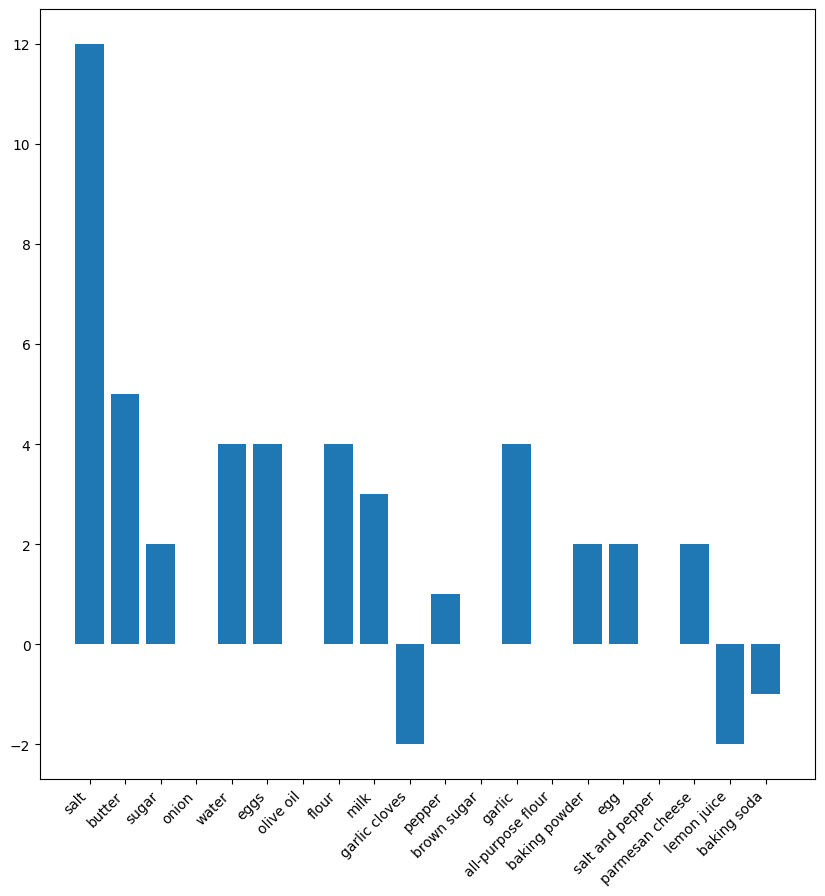

In [ ]:
def plot_closeness(closeness_df):
  plt.figure(figsize=(10, 10))
  plt.bar(closeness_df.index, closeness_df.closeness)
  plt.xticks(rotation=45, ha="right")
  plt.show()

plot_closeness(salted_df)

This plot makes sense but the salt is not very indicative as an ingredient. Let's use a more significant ingredient on a larger scale (all recipes and 1000 ingredients)

In [ ]:
reduced_bool = recipes_bool.iloc[: , 1:1000 ] * 1
reduced_bool

,butter,sugar,onion,water,eggs,olive oil,flour,milk,garlic cloves,pepper,...,acorn squash,light coconut milk,strong coffee,brussels sprouts,unsweetened coconut milk,scallops,pimientos,nutritional yeast,chunky peanut butter,chili-garlic sauce
id,,,,,,,,,,,,,,,,,,,,,
38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
40,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
43,1,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


let's pick an ingredient e.g. vanilla

In [ ]:
vanilla_df = get_closeness("vanilla", reduced_bool)
#plot_closeness(vanilla_df)

# this plot is impssible to read if you increase the number of elements

This makes sense but also we don't want to have the spike on the same ingredient (remove) and we should normalize in some way.

as a positive point,  I could just use this by calculating this measure and taking the top n items.

In this case I can find out that vanilla is the closest to:

In [ ]:
#showing the top combination ingredients excluding itself
def get_closest_items(ingredient, df, number):
  closeness_df = get_closeness(ingredient, df)
  return closeness_df.sort_values(by = "closeness", ascending= False)[1:number]

vanilla_closest = get_closest_items("vanilla", reduced_bool, 10)
vanilla_closest

,closeness
cocoa,-41
mini chocolate chip,-53
crisco,-91
unsweetened chocolate,-99
baking cocoa,-104
flax seed meal,-128
strong coffee,-159
chunky peanut butter,-163
food coloring,-163


let's pick another ingredient: banana

In [ ]:
banana_closest = get_closest_items("banana", reduced_bool, 10)
banana_closest

,closeness
peach,-165
frozen blueberries,-168
vanilla yogurt,-207
low-fat plain yogurt,-219
flax seed meal,-220
nutritional yeast,-226
pear,-226
agave nectar,-226
chunky peanut butter,-227


This seems to work as an easy way to measure the top n items linked to one ingredient

# let's see what we can achieve with clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
data = reduced_bool.transpose()
data

id,38,39,40,41,43,45,46,48,49,50,...,537323,537331,537351,537429,537458,537459,537485,537543,537671,537716
butter,0,0,0,0,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
sugar,0,0,1,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
onion,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
water,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
eggs,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
scallops,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pimientos,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nutritional yeast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chunky peanut butter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# create the kmeans clusters

kmeans = KMeans(n_clusters=30, n_init = 'auto')
kmeans.fit(data)

data['cluster'] = kmeans.labels_

In [ ]:
data

id,38,39,40,41,43,45,46,48,49,50,...,537331,537351,537429,537458,537459,537485,537543,537671,537716,cluster
butter,0,0,0,0,1,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,7
sugar,0,0,1,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,10
onion,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
water,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,3
eggs,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
scallops,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28
pimientos,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28
nutritional yeast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28
chunky peanut butter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28


In [ ]:
for i in range(0,30):
  group = data[data['cluster'] == i].index.tolist()
  print(f"Cluster {i}")
  print(len(group), group )

  print('\n')

Cluster 0
1 ['mayonnaise']


Cluster 1
1 ['salt and pepper']


Cluster 2
1 ['onion']


Cluster 3
1 ['water']


Cluster 4
1 ['parmesan cheese']


Cluster 5
1 ['vanilla']


Cluster 6
1 ['eggs']


Cluster 7
1 ['butter']


Cluster 8
8 ['garlic', 'black pepper', 'tomatoes', 'onions', 'celery', 'extra virgin olive oil', 'parsley', 'bacon']


Cluster 9
1 ['milk']


Cluster 10
1 ['sugar']


Cluster 11
14 ['flour', 'baking powder', 'baking soda', 'vegetable oil', 'cinnamon', 'vanilla extract', 'cream cheese', 'unsalted butter', 'ground cinnamon', 'nutmeg', 'granulated sugar', 'walnuts', 'pecans', 'powdered sugar']


Cluster 12
1 ['pepper']


Cluster 13
1 ['all-purpose flour']


Cluster 14
1 ['cornstarch']


Cluster 15
1 ['olive oil']


Cluster 16
1 ['kosher salt']


Cluster 17
1 ['egg']


Cluster 18
1 ['garlic cloves']


Cluster 19
1 ['tomato paste']


Cluster 20
1 ['cheddar cheese']


Cluster 21
1 ['carrots']


Cluster 22
1 ['oil']


Cluster 23
1 ['brown sugar']


Cluster 24
1 ['garlic powder'